<a href="https://colab.research.google.com/github/Dongkyu1102/Data_final_project_Naver/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%87%BC%ED%95%91_%ED%98%95%ED%83%9C%EC%86%8C%EB%B6%84%EC%84%9D%2B%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

In [ ]:
pip install kiwipiepy

In [ ]:
# 폰트 다운로드 런타임 재실행 필수 !!!!!!!!!!! 실행 및 재실행 안하면 시각화 타이틀 부분의 한글 깨짐 !!!!!!!!!!!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family']) # font
print(plt.rcParams['font.size']) # size

# 데이터 불러오기

In [ ]:
PATH = '/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/Naver_shopping_크롤링/'

In [ ]:
# 크롤링 전체 데이터 불러오기
df = pd.read_csv(f"{PATH}최종통합본.csv", encoding='utf-8-sig')

In [ ]:
df = df.reset_index(drop=True)

# 형태소 분석을 위한 데이터 전처리

In [ ]:
 df.rename(columns=
{
    "content": "content",
    "score": "score",
    "date": "date",
    "brand": "brand",
    "가격": "가격",
    "세정력/거품": "세정력/거품",
    "향기": "향기",
    "트러블/진정": "트러블/진정",
    "배송/서비스/고객대응": "배송/고객서비스",
    "탈모 효과 및 쿨링감": "탈모효과",
    "머릿결*": "머릿결"
}, inplace=True)

In [ ]:
# df_ingredient = df[df['content'].str.contains('미녹시딜')]
# df_ingredient

In [ ]:
df.info()

In [ ]:
df['brand'].unique()

In [ ]:
df['content'].values

In [ ]:
for brand_name in df['brand'].unique():
    if brand_name:
        df_brands= {}
        for brand_name in df['brand'].unique():
            df_brands[brand_name] = df.loc[df['brand'] == brand_name, 'content'].reset_index(drop=True)

        content = list(df_brands[brand_name])
    else:
        content = list(df['content'].values)
        content


In [ ]:
df_brands

In [ ]:
content = list(df_brands['닥터그루트'])

In [ ]:
content

In [ ]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
stopwords = Stopwords()

In [ ]:
text = kiwi.tokenize(content, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if (token.tag == "NNG") or (token.tag == "NNP")]
    kiwi_list.append(tokens)

In [ ]:
morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

In [ ]:
# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['샴푸', '사용', '머리', '두피', '구매', '탈모', '배송', '감사', '생각', '라보에' ,
                                                                '트리트', '기원', '제품', '만족', '머리카락', '주문', '닥터', '그루트']]

In [ ]:
cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(30)

In [ ]:
most_cnt

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic

In [ ]:
im = Image.open('/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/ppt/워드클라우드/shampoo.png')
mask_arr = np.array(im)

In [ ]:
import PIL.Image
img_path_2 = '/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/ppt/워드클라우드/head.png'

# 이미지를 불러옵니다.
img_2 = PIL.Image.open(img_path_2)
img_array_2 = np.array(img_2)

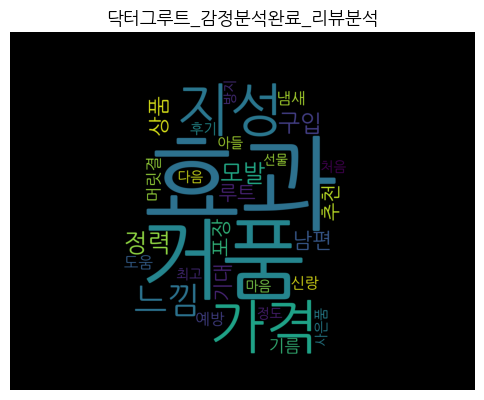

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_감정분석완료_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 컬럼별 분석

In [ ]:
df_groot = df[df['brand']=='닥터그루트']
df_groot

# 닥터그루트 모든 컬럼 동시에 NaN인 것 제거(결측치 제거)

In [ ]:
label = ['가격', '세정력/거품', '향기', '트러블/진정', '배송/고객서비스', '탈모효과', '머릿결']
label_all_null = df_groot.loc[df[label].isnull().all(axis=1)]

In [ ]:
label_all_null

In [ ]:
df_groot_1 = df_groot.drop(label_all_null.index)
df_groot_1

In [ ]:
print(df_groot_1['가격'].value_counts())
print(df_groot_1['가격'].value_counts(normalize=True))

In [ ]:
df_groot_1['가격'] == 0

In [ ]:
df_groot_1[df_groot_1['가격'] == 0]

In [ ]:
df_groot_1[df_groot_1['가격'] == 0]['content']

In [ ]:
df_groot_1[df_groot_1['가격'] == 0]['content'].tolist()

In [ ]:
df_groot_price_bad = df_groot_1[df_groot_1['가격'] == 0]['content'].tolist()

# 닥터그루트 가격 부정적 리뷰 분석

In [ ]:
text = kiwi.tokenize(df_groot_price_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "VA") or (token.tag == "NNG")]  # NNP, NNG, VV, VA, MAG, EF
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['샴푸', '사용', '머리', '배송', '감사', '생각', '라보에' , '정력', '탈모',
                                                                '트리트', '기원', '제품', '머리카락', '주문', '닥터', '그루트']]


cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

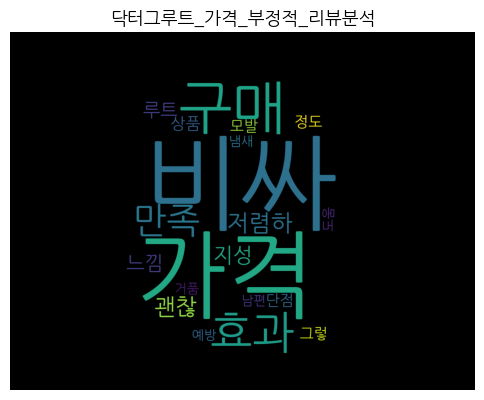

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_가격_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 세정력 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['세정력/거품'] == 0]['content'].tolist()

df_groot_cleaning_bad = df_groot_1[df_groot_1['세정력/거품'] == 0]['content'].tolist()

In [ ]:
df_groot_cleaning_bad = df_groot_1[df_groot_1['세정력/거품'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_cleaning_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "NNG") or (token.tag == "VA") or (token.tag == "MAG")]   # NNP, NNG, VV, VA, MAG, EF
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]


# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['샴푸', '사용', '머리', '구매', '탈모', '배송', '감사', '생각', '정력', '닥터', '제품']]


cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

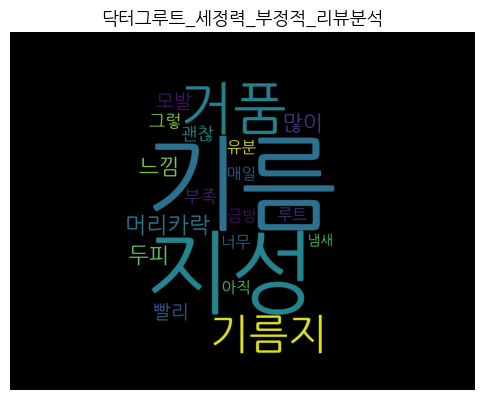

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_세정력_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 향기 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['향기'] == 0]['content'].tolist()

df_groot_scent_bad = df_groot_1[df_groot_1['향기'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_scent_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "NNG") or (token.tag == "VA") or (token.tag == "MAG")]   # NNP, NNG, VV, VA, MAG, EF
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['샴푸', '사용', '머리', '구매', '제품', '스킨']]


cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

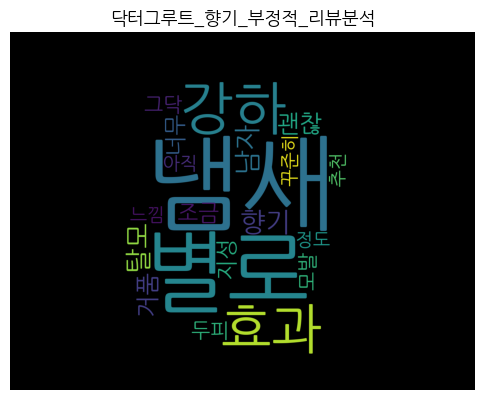

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_향기_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 트러블 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['트러블/진정'] == 0]['content'].tolist()

df_groot_trouble_bad = df_groot_1[df_groot_1['트러블/진정'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_trouble_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "NNP") or (token.tag == "NNG") ]   # VV, VA, MAG, EF
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['사용', '샴푸', '제품', '구입', '구매', '머리']]



cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

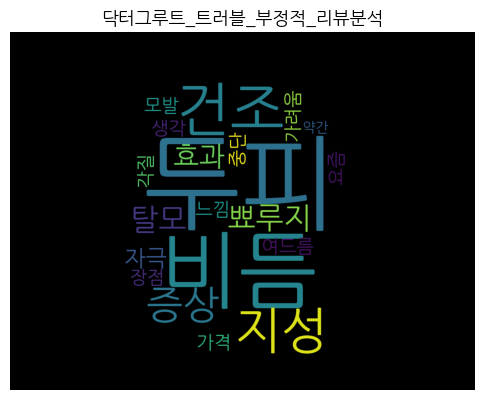

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_트러블_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 배송/고객서비스 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['배송/고객서비스'] == 0]['content'].tolist()

df_groot_service_bad = df_groot_1[df_groot_1['배송/고객서비스'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_service_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "NNG") or (token.tag == "VV") or (token.tag == "VA") or (token.tag == "MAG")   ]    # NNP, NNG(배송), VV(깨지), VA(느리), MAG(오래) - 일반부사
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['사용', '샴푸', '제품', '구입', '구매', '머리', '탈모', '괜찮', '만족','상품', '보내']]



cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(30)

most_cnt

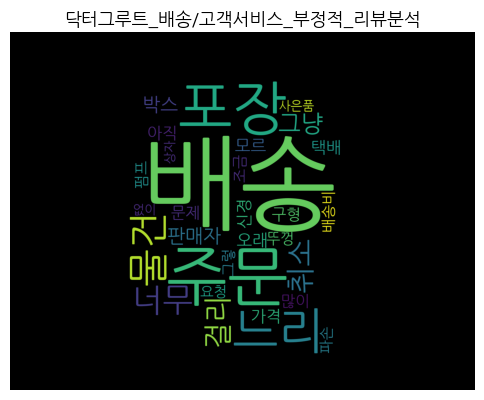

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_배송/고객서비스_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 탈모효과 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['탈모효과'] == 0]['content'].tolist()

df_groot_effect_bad = df_groot_1[df_groot_1['탈모효과'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_effect_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "NNP")  or (token.tag == "NNG") or (token.tag == "VV") or (token.tag == "VA")  ]    # NNP, NNG, VV, VA, MAG-일반부사
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['사용', '샴푸', '제품', '구입', '구매', '괜찮', '만족','상품', '보내', '요즘', '배송', '기존', '보이', '머리', '비싸']]



cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

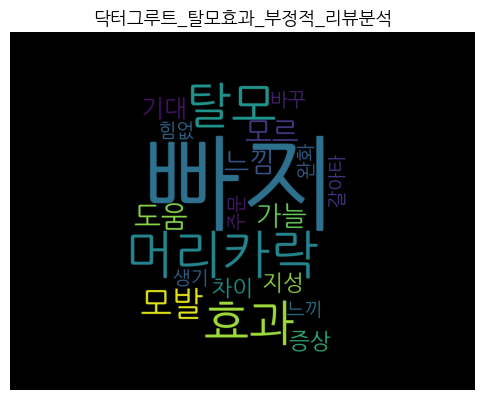

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_탈모효과_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()

# 닥터그루트 머릿결 부정적 리뷰 분석

In [ ]:
df_groot_1[df_groot_1['머릿결'] == 0]['content'].tolist()

df_groot_hair_bad = df_groot_1[df_groot_1['머릿결'] == 0]['content'].tolist()

In [ ]:
text = kiwi.tokenize(df_groot_hair_bad, stopwords=stopwords)
kiwi_list = []
for result in text:
    tokens = [token.form for token in result if  (token.tag == "MAG")  or (token.tag == "NNG") or (token.tag == "VV") or (token.tag == "VA")  ]    # NNG, VV, VA, MAG-일반부사
    kiwi_list.append(tokens)

morpheme_kiwi = []
for i in range(len(kiwi_list)):
     morpheme_kiwi += kiwi_list[i]

# 한 글자 단어와 지정된 단어 제거
morpheme_kiwi = [word for word in morpheme_kiwi if len(word) >= 2]
morpheme_kiwi = [word for word in morpheme_kiwi if word not in ['사용', '샴푸', '정력', '제품', '괜찮', '많이', '주문', '머리' , '머리카락', '빠지', '모르', '탈모']]



cnt = Counter(morpheme_kiwi)
most_cnt = cnt.most_common(20)

most_cnt

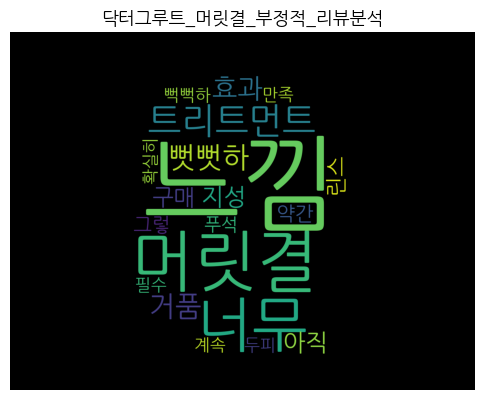

In [ ]:
most_cnt_dic = {word:num for word, num in most_cnt}
most_cnt_dic


wc = WordCloud(font_path='/content/drive/MyDrive/final-project_kyu/프로젝트_시각화/NanumGothic.ttf', mask=img_array_2, scale=2.0, max_font_size=250, background_color ='black', colormap='viridis',
                width = 700, height = 700, random_state = 43)

gen = wc.generate_from_frequencies(most_cnt_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wc)
plt.title("닥터그루트_머릿결_부정적_리뷰분석", size = 13)  # 타이틀 명 변경

plt.axis('off') # 그래프 축 제거

plt.show()